In [1]:
#Importamos las librerías a utilizar
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

Valores: alfa=2.987310128395481, beta=-0.0031975547461251075
R2:  0.33305213788469623


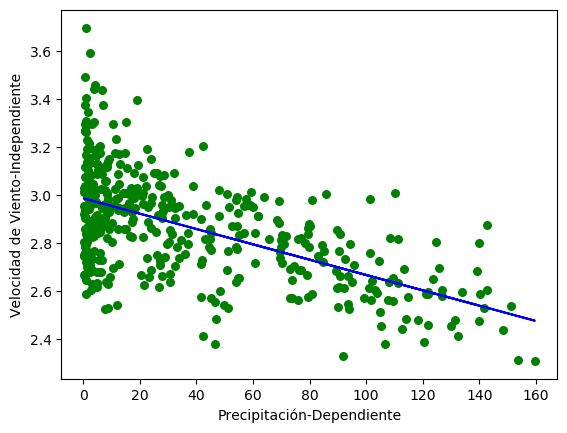

In [2]:
dataset = pd.ExcelFile('D:\Joss\Ciclo_5\Tecnicas_Programacion\Trabajofinal\data_can1.xls')
dataset = pd.read_excel(dataset,'Paper1')
#Función para obtener el tamaño de un array.
def estimate_alfa_beta(x,y):
  n=np.size(x)
  #se calcula las medias de x y y
  m_x,m_y= np.mean(x), np.mean(y)
 
  #Se calcula la sumatoria de XY y la de XX.
  Sumatoria_xy=np.sum((x-m_x)*(y-m_y))
  Sumatoria_xx=np.sum((x-m_x)**2)
 
  #se calcula los coeficientes de regresión osea b0 y b1
 
  beta=Sumatoria_xy / Sumatoria_xx
  alfa= m_y - beta*m_x
  return (alfa,beta)
#Función para graficado
def plot_regression(x,y,b):
  plt.scatter(x,y,color="g",marker="o",s=30)
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred,color="b")
 
  plt.xlabel("Precipitación-Dependiente")
  plt.ylabel("Velocidad de Viento-Independiente")
  plt.show()

#Función para integrar nuestra data en los ejes
def main():
  #DATASET
  x=np.array(dataset.iloc[1:433,1])
  y=np.array(dataset.iloc[1:433,6])
  #Se obtiene b0 y b1
  b=estimate_alfa_beta(x,y)
  print("Valores: alfa={}, beta={}".format(b[0],b[1]))
  #Obtención de R2
  y_pred=b[0]+b[1]*x
  print('R2: ',r2_score(y,y_pred))
  plot_regression(x,y,b)
if __name__=="__main__":
  main()